## Plotting Studied Power-Law Functions for Brown Dwarf Stars (BDs)

#### Importing Packages

In [167]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### Defining a general power law function and mass range

All of the papers that we consider here are in agreement that the initial mass function (IMF) for brown dwarfs is best represented by a power law function, much like full-fledged stars and planets. The general power law equation is as follows:

$ f(\alpha) = M^{-\alpha} $,

Where M represents the mass of an object and $\alpha$ represents the index of the function. 

We know that we can find a general power law to represent brown dwarfs in most star forming regions because, in a [2021 paper by M. J. Huston and K. L. Luhman](https://arxiv.org/pdf/2101.11497), a conclusion is made that there are not significant variations in the IMF of low mass stars and brown dwarfs based on star-forming conditions.

In [64]:
def power_law(M, a):
    return M ** (-1 * a)
# M represents a mass value, and a is the associated alpha value of a specified paper

# By NASA JPL, BDs have a mass range of 13-80 Jupiter masses (0.0124 - 0.0764 solar masses)
BD_masses = np.linspace(0.0124, 0.0764, 1000)

We chose this mass range for brown dwarf stars because 80 Jupiter masses is approximately the lower mass limit for hydrogen burning, which brown dwarfs characteristically do not do. In addition, 13 Jupiter masses is the lower mass limit for deuterium burning, which is what defines a brown dwarf star. This mass range is supported by [NASA JPL](https://www.jpl.nasa.gov/images/pia23685-what-is-a-brown-dwarf).

#### Defining different $\alpha$ values and errors based on specified papers

To create a general power law function for brown dwarfs we wanted to consider a plethora of functions already found. To do this, we found seven papers over a span of 25 years surveying different star-forming regions. The papers considered were as follows:

1. "L Dwarfs and the Substellar Mass Function" ([I. Neill Reid, et al. 1999](https://iopscience.iop.org/article/10.1086/307589/pdf))
2. "The Substellar Mass Function: A Baysian Approach" ([P. R. Allen, et al. 2005](https://iopscience.iop.org/article/10.1086/429548/pdf))
3. "The low-mass content of the massive young star cluster RCW 38" ([K. Mužić, et al. 2017](https://academic.oup.com/mnras/article/471/3/3699/4044705))
4. "Looking Deep into the Rosette Nebula’s Heart: The (Sub)stellar Content of the Massive Young Cluster NGC 2244" ([K. Mužić, et al. 2019](https://ui.adsabs.harvard.edu/abs/2019ApJ...881...79M/abstract))
5. "The Field Substellar Mass Function Based on the Full-sky 20 pc Census of 525 L, T, and Y Dwarfs" ([J. D. Kirkpatrick, et al. 2021](https://iopscience.iop.org/article/10.3847/1538-4365/abd107/pdf))
6. "A Self-consistent Model for Brown Dwarf Populations" ([R. E. Ryan, Jr., et al. 2022](https://iopscience.iop.org/article/10.3847/1538-4357/ac6de5/pdf))
7. "A Volume-limited Sample of Ultracool Dwarfs. II. The Substellar Age and Mass Functions in the Solar Neighborhood" ([W. Best, et al. 2024](https://iopscience.iop.org/article/10.3847/1538-4357/ad39ef/pdf))

Below we list the indexes of the power laws found in the specified papers and their respective errors.

In [129]:
#Neill Reid 1999
NR_a = 1.3
NR_aerr = 0.3  #made up because actual paper does not include errors or an exact numerical conclusion

#Allen 2005
A_a = 0.3
A_aerr = 0.6  #error > actual value --> unconstrained

#Mužić 2017 (RCW 38)
M1_a = 0.29
M1_aerr = 0.11

#Mužić 2019 (NGC 2244)
M2_a = 1.03
M2_aerr = 0.02

#Kirkpatrick 2021
K_a = 0.6
K_aerr = 0.1

#Ryan 2022
R_a = 0.71
R_aerr = 0.11

#Best 2024
B_a = 0.58
B_paerr = 0.16
B_naerr = 0.20
B_avgerr = 0.18

#### Plotting curves together (w/o errors)

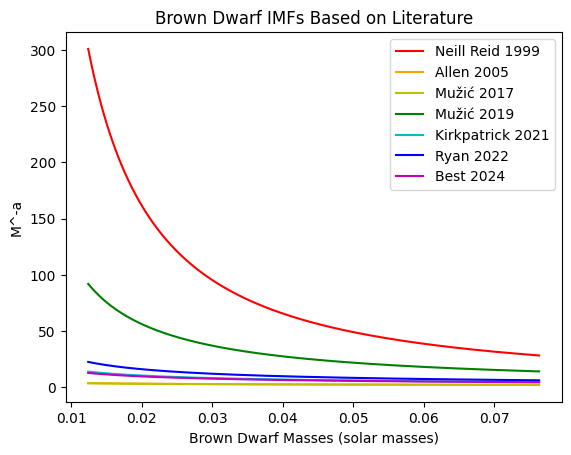

In [67]:
#plotting different IMFs based on literature
plt.plot(BD_masses, power_law(BD_masses, NR_a), color = 'r', label = "Neill Reid 1999")
plt.plot(BD_masses, power_law(BD_masses, A_a), color = 'orange', label = "Allen 2005")
plt.plot(BD_masses, power_law(BD_masses, M1_a), color = 'y', label = "Mužić 2017")
plt.plot(BD_masses, power_law(BD_masses, M2_a), color = 'g', label = "Mužić 2019")
plt.plot(BD_masses, power_law(BD_masses, K_a), color = 'c', label = "Kirkpatrick 2021")
plt.plot(BD_masses, power_law(BD_masses, R_a), color = 'b', label = "Ryan 2022")
plt.plot(BD_masses, power_law(BD_masses, B_a), color = 'm', label = "Best 2024")

#organizing the graph
plt.title("Brown Dwarf IMFs Based on Literature")
plt.xlabel("Brown Dwarf Masses (solar masses)")
plt.ylabel("M^-a")
plt.legend()
plt.show()

Looking at the curves, it is clear that the Neill Reid conclusion of the $\alpha$ value is outdated in comparison to the other papers. This is most likely due to outdated theory and information, as this paper was created in 1999 using simulations, versus actual data of brown dwarf stars. With this in mind, we will subtract it from our future considerations as the rest of the papers considered since then agree that $\alpha$ should be less than 1. In addition, it is explained in the Mužić 2019 paper that NGC 2244 is unusually dense, which is leading to a larger index value than typical. For this reason, I omitted this paper as well from consideration. Lastly, in Allen 2005, the error for the function is larger than the actual $\alpha$ value, hinting that the function is unconstrained and should not be considered. Thus, we omitted this paper as well.

Below is the graph subtracting the Neill Reid, Allen, and Mužić 2019 conclusions.

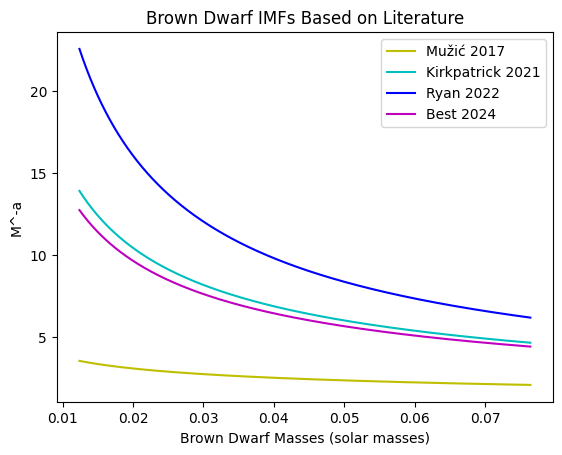

In [70]:
#plotting different IMFs based on literature
plt.plot(BD_masses, power_law(BD_masses, M1_a), color = 'y', label = "Mužić 2017")
plt.plot(BD_masses, power_law(BD_masses, K_a), color = 'c', label = "Kirkpatrick 2021")
plt.plot(BD_masses, power_law(BD_masses, R_a), color = 'b', label = "Ryan 2022")
plt.plot(BD_masses, power_law(BD_masses, B_a), color = 'm', label = "Best 2024")

#organizing the graph
plt.title("Brown Dwarf IMFs Based on Literature")
plt.xlabel("Brown Dwarf Masses (solar masses)")
plt.ylabel("M^-a")
plt.legend()
plt.show()

#### Accounting for error in $\alpha$

At this point we wanted to explore the individual functions and their errors to make sure that they seemed reasonable. Thus, we used the specified errors to find upper and lower bounds for each function and plotted the information.

In [71]:
#Mužić 2017 (RCW 38)
M1_aup = M1_a + M1_aerr
M1_alow = M1_a - M1_aerr
M1_outup = power_law(BD_masses, M1_aup)
M1_outlow = power_law(BD_masses, M1_alow)

#Kirkpatrick 2021
K_aup = K_a + K_aerr
K_alow = K_a - K_aerr
K_outup = power_law(BD_masses, K_aup)
K_outlow = power_law(BD_masses, K_alow)

#Ryan 2022
R_aup = R_a + R_aerr
R_alow = R_a - R_aerr
R_outup = power_law(BD_masses, R_aup)
R_outlow = power_law(BD_masses, R_alow)

#Best 2024
B_aup = B_a + B_paerr
B_alow = B_a - B_naerr
B_outup = power_law(BD_masses, B_aup)
B_outlow = power_law(BD_masses, B_alow)

#### Graphing Individual Power-Law Functions (Accounting for Error in $\alpha$)

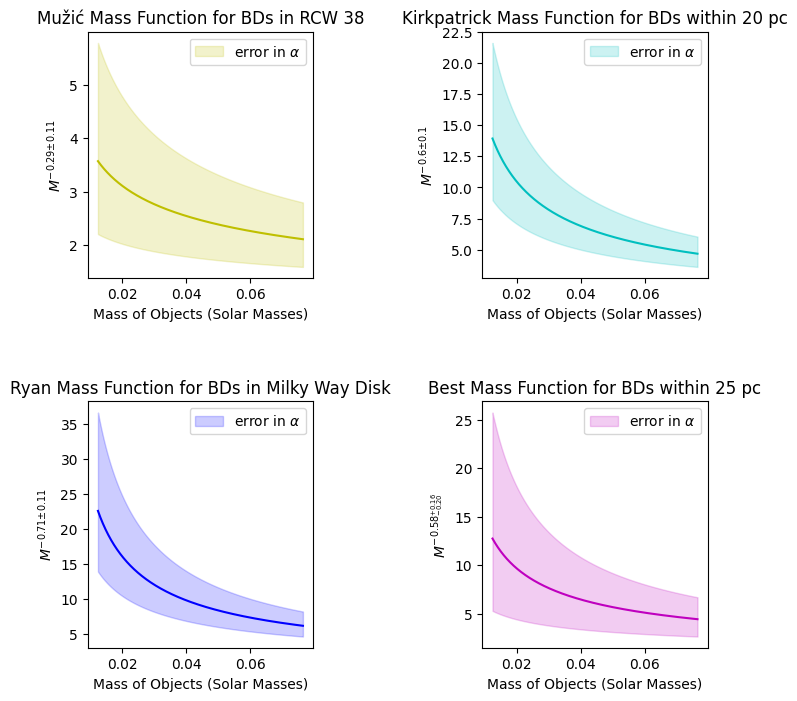

In [99]:
#Setting up subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
plt.subplots_adjust(hspace=0.5, wspace=0.75)

#Mužić 2017
ax[0,0].plot(BD_masses, power_law(BD_masses, M1_a), color='y')
ax[0,0].fill_between(BD_masses, M1_outup, M1_outlow, color='y', alpha=0.2, label="error in $\\alpha$")
ax[0,0].set_title("Mužić Mass Function for BDs in RCW 38")
ax[0,0].set_xlabel("Mass of Objects (Solar Masses)")
ax[0,0].set_ylabel("$M^{-0.29 ± 0.11}$")
ax[0,0].legend()

#Kirkpatrick 2021
ax[0,1].plot(BD_masses, power_law(BD_masses, K_a), color='c')
ax[0,1].fill_between(BD_masses, K_outup, K_outlow, color='c', alpha=0.2, label="error in $\\alpha$")
ax[0,1].set_title("Kirkpatrick Mass Function for BDs within 20 pc")
ax[0,1].set_xlabel("Mass of Objects (Solar Masses)")
ax[0,1].set_ylabel("$M^{-0.6 ± 0.1}$")
ax[0,1].legend()

#Ryan 2022
ax[1,0].plot(BD_masses, power_law(BD_masses, R_a), color='b')
ax[1,0].fill_between(BD_masses, R_outup, R_outlow, color='b', alpha=0.2, label="error in $\\alpha$")
ax[1,0].set_title("Ryan Mass Function for BDs in Milky Way Disk")
ax[1,0].set_xlabel("Mass of Objects (Solar Masses)")
ax[1,0].set_ylabel("$M^{-0.71 ± 0.11}$")
ax[1,0].legend()

#Best 2024
ax[1,1].plot(BD_masses, power_law(BD_masses, B_a), color='m')
ax[1,1].fill_between(BD_masses, B_outup, B_outlow, color='m', alpha=0.2, label="error in $\\alpha$")
ax[1,1].set_title("Best Mass Function for BDs within 25 pc")
ax[1,1].set_xlabel("Mass of Objects (Solar Masses)")
ax[1,1].set_ylabel("$M^{-0.58^{+ 0.16}_{-0.20~}}$")
ax[1,1].legend()

plt.show()

### Creating a General Power-Law Curve Fit

In [147]:
#Combine all of the power_law output data for all 5 papers
all_power = np.concatenate([power_law(BD_masses, M1_a), power_law(BD_masses, K_a), 
                            power_law(BD_masses, R_a), power_law(BD_masses, B_a)])
all_err = np.concatenate([np.tile(M1_aerr, 1000), np.tile(K_aerr, 1000), 
                          np.tile(R_aerr, 1000), np.tile(B_avgerr, 1000)])

In [148]:
#make sure all entries are appended
print(len(all_power), len(all_err))

4000 4000


In [149]:
#create a mass array of the same size
all_masses = np.tile(BD_masses, 4)

In [150]:
#make sure it is the right size
len(all_masses)

4000

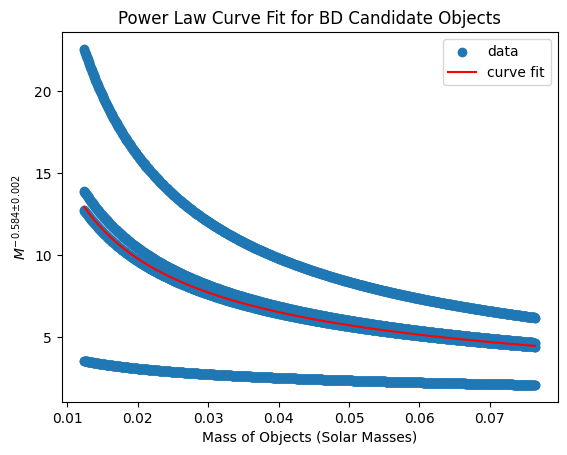

In [173]:
#use scipy curve fit to create a general power law
popt, pcov = curve_fit(power_law, sorted_masses, sorted_powers, sigma = sorted_errors)#, absolute_sigma = True)   #popt gives fit value for a
avg_a = popt
avg_aerr = np.sqrt(np.diag(pcov))    #gives the error in a

#create an array with mass values using fitted a
avg_power = power_law(sorted_masses, avg_a)

#plot combined mass and power law datasets
plt.figure()
plt.scatter(sorted_masses, sorted_powers, label = 'data')
plt.plot(sorted_masses, avg_power, color = 'r', label = 'curve fit')

#label graph
plt.title("Power Law Curve Fit for BD Candidate Objects")
plt.xlabel("Mass of Objects (Solar Masses)")
plt.ylabel("$M^{-0.584 ± 0.002}$")
plt.legend()
plt.show()

In [174]:
#determine the index of the power law based on the curve fit
print(avg_a, avg_aerr)

[0.5836496] [0.00202593]


Based on the curve fit, our a value for BDs is 0.5836496 ± 0.00202593. The error is smaller than expected, which may take more looking into. 

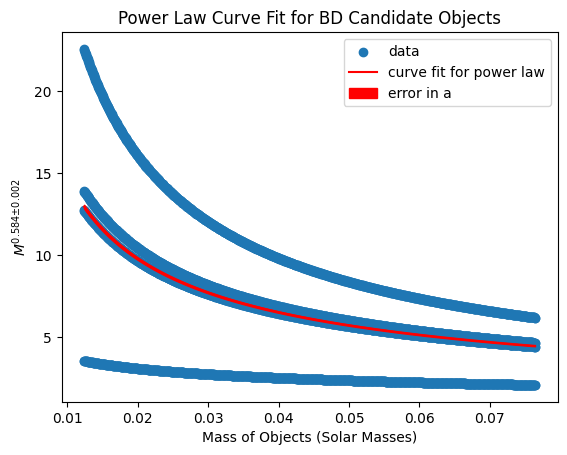

In [175]:
#account for error in plot
avg_aup = avg_a + avg_aerr
avg_alow = avg_a - avg_aerr
power_outup = power_law(sorted_masses, avg_aup)
power_outlow = power_law(sorted_masses, avg_alow)

plt.scatter(sorted_masses, sorted_powers, label = 'data')
plt.plot(sorted_masses, power_law(sorted_masses, avg_a), color= 'r', label = "curve fit for power law")
plt.fill_between(sorted_masses, power_outup, power_outlow, color = 'r', label = "error in a")
plt.title("Power Law Curve Fit for BD Candidate Objects")
plt.xlabel("Mass of Objects (Solar Masses)")
plt.ylabel("$M^{0.584 ± 0.002}$")
plt.legend()
plt.show()

In [154]:
range(all_power)

TypeError: only integer scalar arrays can be converted to a scalar index

#### Cleaning Up the Curve Fit

In [159]:
#combining all mass and output data sets to fit
all_masses = np.array(all_masses)
all_power = np.array(all_power)

#put combined mass data set into increasing order and reorder output array to match new indices 
sorted_indices = np.argsort(all_masses)
sorted_masses = all_masses[sorted_indices]
sorted_powers = all_power[sorted_indices]
sorted_errors = all_err[sorted_indices]

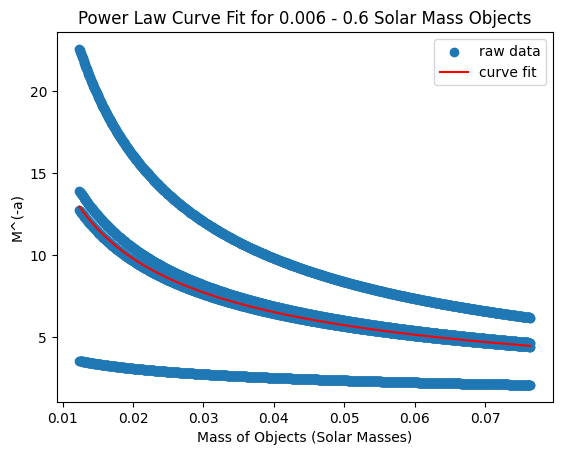

In [160]:
#use scipy curve fit to create a general power law
popt, pcov = curve_fit(power_law, sorted_masses, sorted_powers,sigma=sorted_errors, absolute_sigma=True)   #popt gives fit value for a
avg_a = popt
avg_aerr = np.sqrt(np.diag(pcov))    #gives the error in a

#create an array with mass values using fitted a
avg_power = power_law(sorted_masses, avg_a)

#plot combined mass and power law datasets
plt.figure()
plt.scatter(sorted_masses, sorted_powers, label='raw data')
plt.plot(sorted_masses, avg_power, color='r', label='curve fit')
plt.title("Power Law Curve Fit for 0.006 - 0.6 Solar Mass Objects")
plt.xlabel("Mass of Objects (Solar Masses)")
plt.ylabel("M^(-a)")
plt.legend()
plt.show()

In [161]:
print(avg_aerr)

[7.20652905e-05]


#### Converting into a log function to match the curve fit

In [171]:
#take the log of each of the values in sorted_powers
log_power = []
for n in sorted_powers:
    log_power.append(math.log(n))

#take the log of each of the values in sorted_masses
log_masses = []
for a in sorted_masses:
    log_masses.append(math.log(a))

#make sure both are arrays
log_power = np.array(log_power)
log_masses = np.array(log_masses)

Fitted parameters: a = -0.5450, b = -4.1664664035223473e-10
RMSE: 0.5058
MAE: 0.4105
R-squared: 0.2151


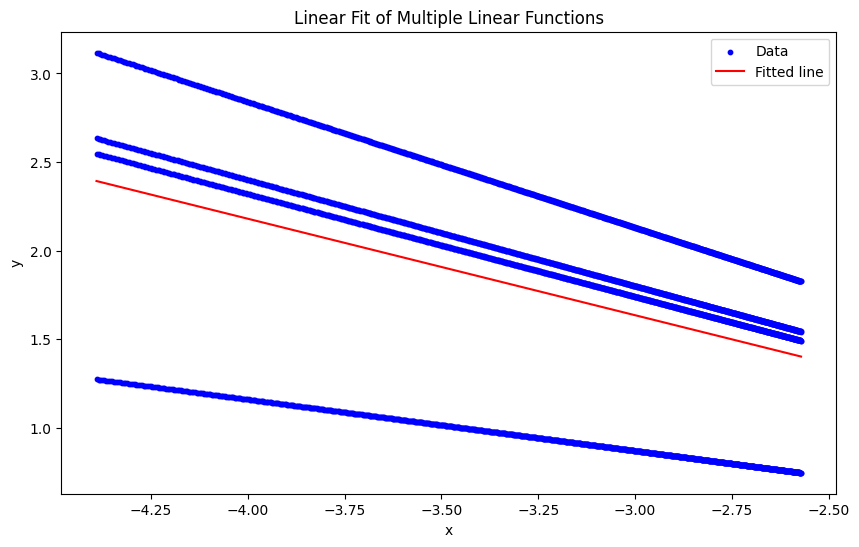

In [170]:
#define a linear model
def linear_model(x, a, b):
    return a * x + b

#curve fit
params, covariance = curve_fit(linear_model, log_masses, log_power)

#get the fitted values
power_fitted = linear_model(log_masses, *params)

#calculate residuals
residuals = log_power - power_fitted

#calculate error metrics
rmse = np.sqrt(mean_squared_error(log_power, power_fitted))
mae = mean_absolute_error(log_power, power_fitted)
r2 = r2_score(log_power, power_fitted)

#output the results
print(f"Fitted parameters: a = {params[0]:.4f}, b = {params[1]}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R-squared: {r2:.4f}")

#plot the results
plt.figure(figsize=(10, 6))
plt.scatter(log_masses, log_power, label='Data', color='blue', s=10)
plt.plot(log_masses, linear_model(log_masses, *params), label='Fitted line', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit of Multiple Linear Functions')
plt.show()

In [123]:
linpower_fit = []
for l in log_masses:
    linpower_fit.append(m*l + b)

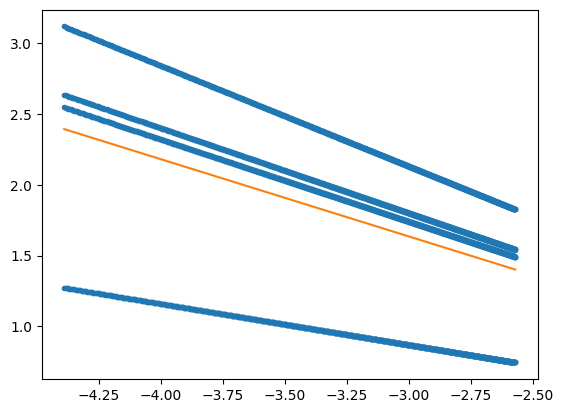

In [124]:
plt.plot(log_masses, log_power, '.')
plt.plot(log_masses, linpower_fit)
plt.show()

In [ ]:
#find general error by calculating average range
